In [1]:
from sklearn import feature_extraction
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set()
%matplotlib inline

## Text Processing

In [2]:
bible = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")
bible.head()
import string
bible['text']= bible['text'].str.lower()
bible['text'] = bible['text'].str.replace('[^\w\s]','')
bible['text'] = bible['text'].str.replace('\d+', '')
bible['text'] = bible['text'].str.strip(' ')
text = bible['text']
words = text.str.split(' ')
bible

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,in the beginning god created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,and the earth was waste and void and darkness ...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,and god said let there be light and there was ...
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,and god saw the light that it was good and god...
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,and god called the light day and the darkness ...
5,6,1001006,OT,Law,gen,gen_1,gen_1:6,and god said let there be a firmament in the m...
6,7,1001007,OT,Law,gen,gen_1,gen_1:7,and god made the firmament and divided the wat...
7,8,1001008,OT,Law,gen,gen_1,gen_1:8,and god called the firmament heaven and there ...
8,9,1001009,OT,Law,gen,gen_1,gen_1:9,and god said let the waters under the heavens ...
9,10,1001010,OT,Law,gen,gen_1,gen_1:10,and god called the dry land earth and the gath...


In [3]:
# Create a lone list of words in the bible, in order of narrative time
bible2 = []
for verse in range(len(words)):
    bible2.append(words.iloc[verse,])
    
def iterFlatten(root):
    if isinstance(root, (list, tuple)):
        for element in root:
            for e in iterFlatten(element):
                yield e
    else:
        yield root
        
bible3 = list(iterFlatten(bible2))

## Text Visualization

Number of unique words in the bible :  12654


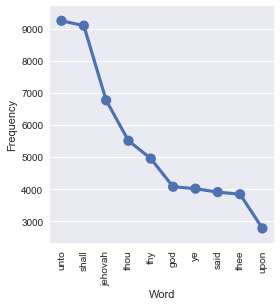

In [4]:
#Count the frequency of each word
from collections import Counter
#Word Frequency
counts = Counter(bible3)
#Convert counter object to data frame
word_count = pd.DataFrame.from_dict(counts, orient='index').reset_index()
word_count.rename(columns = {'index' : 'Word',0:'Frequency'},inplace = True)
word_count = word_count.sort_values('Frequency',ascending=False)
stop = set(stopwords.words('english'))
#Remove stop words from the dataframe
word_count2 = word_count[~word_count['Word'].isin(stop)]
word_count2.head()
#Number of unique words
print("Number of unique words in the bible : ", len(word_count2))
#Top ten words
word_count2.head(10)
#Plot top 10 words after removing stop words
g = sns.factorplot(x='Word',y='Frequency',data=word_count2[0:10])
g.set_xticklabels(rotation=90)
plt.show()

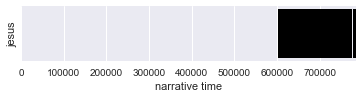

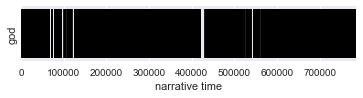

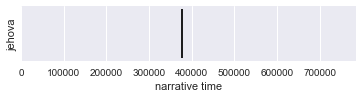

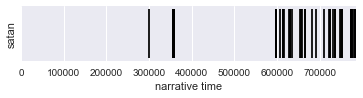

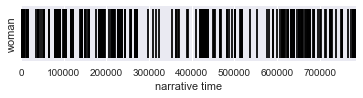

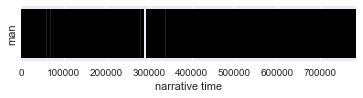

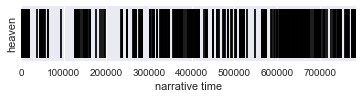

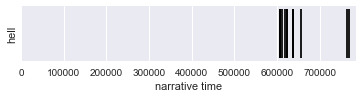

In [5]:
#Function to plot a dispersion graph
def dispersion(word):
    d = list()
    for i in range(0,len(bible3)):
        if bible3[i] == word:
            d.append(i)

    fig, ax = plt.subplots()
    ax.vlines(d, 0, 1, edgecolor="black")
    ax.set_xlim([0, len(bible3)]) # set the lower and upper limits of graph
    ax.set_xlabel('narrative time')
    ax.set_xticks([0],minor=True) # turn off: ax.set_xticks([])
    ax.set_ylabel(word) # turn off by droping this line
    ax.set_yticks([])
    fig.set_figheight(1)
    plt.show()

words_of_interest = ['jesus','god','jehova','satan','woman','man','heaven','hell']
for i in words_of_interest:
    #Dispersion plot words
    dispersion(i)

The figures above show the ocurance of words in the biblical timeline. There are some really interesting things going on here. For one, I find it interesting that "Jesus" only occurs in the last quater of the bible timeline. I also thought the difference in frequency of "woman" and "man" is interesting. 

In [6]:
#Vectorizes text feature using term frequency-inverse document frequency 
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union('unto')
vec = feature_extraction.text.TfidfVectorizer(stop_words = stop_words,token_pattern=r'(?u)\b[A-Za-z]+\b', ngram_range=(1,4), max_features=30000)
X = vec.fit_transform(bible['text'].values.astype('str'))
feature_names = vec.get_feature_names()
text = pd.DataFrame(X.toarray(), columns=feature_names)

# merge vectorized columns with original dataframe
bible_vec = pd.merge(bible, text, left_index=True, right_index=True)
bible_vec = bible_vec.drop(['text'],axis = 1)
bible_vec.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aaron did,aaron garments,...,zoar,zobah,zohar,zophar,zophar naamathite,zorah,zorah eshtaol,zuar,zur,zurishaddai
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# The dataset is now vectorized and ready for analysis.
X = bible_vec.drop(['Unnamed: 0','field_x','Testaments','Sections','Books','Chapters','Verses'],axis=1)
X.head()

,aaron,aaron did,aaron garments,aaron moses,aaron nadab,aaron nadab abihu,aaron numbered,aaron priest,aaron priests,aaron said,...,zoar,zobah,zohar,zophar,zophar naamathite,zorah,zorah eshtaol,zuar,zur,zurishaddai
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [8]:
# keep the first n principal components of the data
pca = PCA(n_components=30)
# fit PCA model to data
pca.fit(X)

# transform data onto the first two principal components
X_pca = pca.transform(X)
print("Original shape: {}".format(X.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (31103, 30000)
Reduced shape: (31103, 30)


Text(0,0.5,'Second principal component')

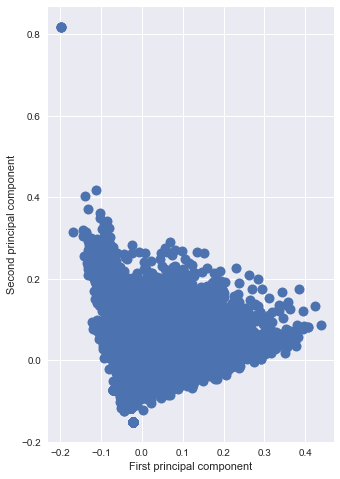

In [9]:
# plot first vs. second principal component
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1])
#plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## Part A: Cluster Visualization

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
clust = ['Kmeans','Hierarchal','Gaussian Mixture']

Text(0,0.5,'PC2')

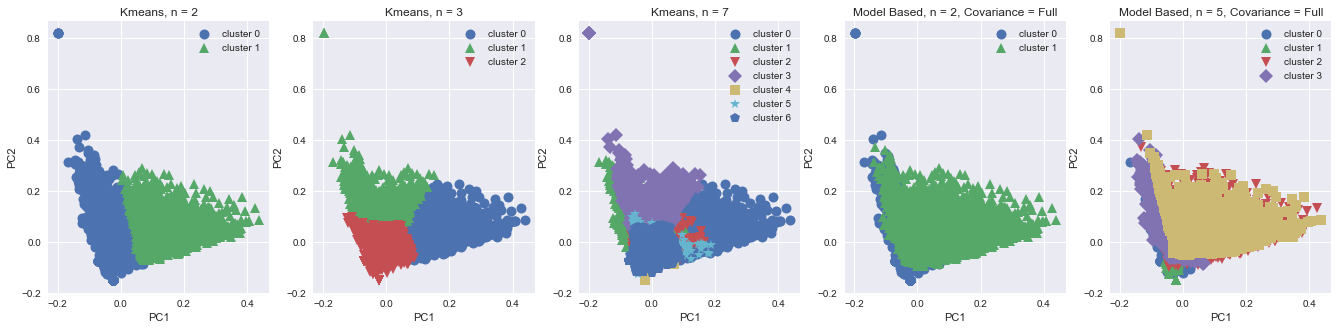

In [11]:
# Here I compare Kmeans with varying clusters and Model Based clustering with varying clusters. 
fig, axes = plt.subplots(1, 5, figsize=(23,5))

# Kmeans:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[0])
ax = axes[0]
ax.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3","cluster 4","cluster 5", "cluster 6", "cluster 7"], loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Kmeans, n = 2')
ax.set_ylabel('PC2')


# Kmeans:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[1])
ax = axes[1]
ax.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3","cluster 4","cluster 5", "cluster 6", "cluster 7"], loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Kmeans, n = 3')
ax.set_ylabel('PC2')

# Kmeans:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[2])
ax = axes[2]
ax.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3","cluster 4","cluster 5", "cluster 6", "cluster 7"], loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Kmeans, n = 7')
ax.set_ylabel('PC2')

# Model Based:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X_pca)
assignments =gmm.predict(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[3])
ax = axes[3]
ax.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3"], loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Model Based, n = 2, Covariance = Full')
ax.set_ylabel('PC2')

# Model Based:
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(X_pca)
assignments =gmm.predict(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[4])
ax = axes[4]
ax.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3"], loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Model Based, n = 5, Covariance = Full')
ax.set_ylabel('PC2')

In theory, the plots below should give us a visualization of the two testaments (n = 2) and the 7 books (n = 7) of the bible. 

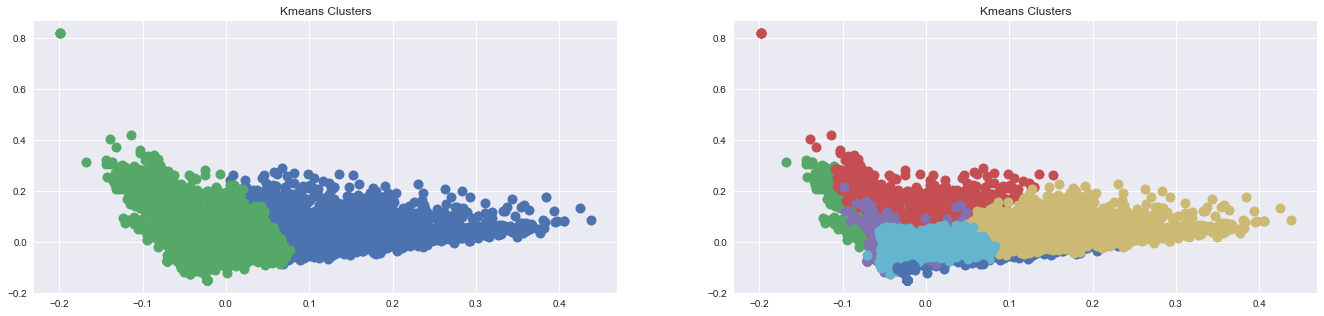

In [12]:
plt.figure(figsize=(23,5))

plt.subplot(121)
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], kmeans.labels_, markers='o')
plt.title('{:} Clusters'.format(clust[0]));

plt.subplot(122)
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], kmeans.labels_, markers='o')
plt.title('{:} Clusters'.format(clust[0]));
#fig2=sns.relplot(x="PCA0", y="PCA1", data=X_pca, hue="Testament", size='Section', style='Testa', legend='full', palette= 'Set2') 

In [13]:
X_pca = pd.DataFrame(X_pca)
kmeansTest = KMeans(n_clusters=2, random_state=1)
kmeansTest.fit(X_pca)
bible['groupTesta']=kmeansTest.labels_
pd.crosstab(bible.groupTesta,bible.Testaments,margins=True)

Testaments,NT,OT,All
groupTesta,,,
0,625,4196,4821
1,7333,18949,26282
All,7958,23145,31103


In [14]:
kmeansSect = KMeans(n_clusters=7)
kmeansSect.fit(X_pca)
bible['groupSect']=kmeansSect.labels_
pd.crosstab(bible.groupSect,bible.Sections,margins=True)

Sections,Apostles,Gospels,History,Law,Paul,Prophets,Wisdom,All
groupSect,,,,,,,,
0,124,511,179,399,333,450,136,2132
1,15,674,937,534,15,272,99,2546
2,93,385,165,995,151,1352,480,3621
3,28,144,365,413,31,449,699,2129
4,34,184,278,665,58,429,480,2128
5,0,0,0,98,0,2,0,100
6,845,2888,5094,2748,1445,2536,2891,18447
All,1139,4786,7018,5852,2033,5490,4785,31103


#### A. What is the optimal number of clusters of these 66 Books? Find these clusters and describe them. Are you surprised at your finding? Why/Why not?
The optimal number of clusters for this data is 2, though this could not be shown because my computer could not handle the computation of sillhouette averaging for this dataset. I am surpised at this, becuase even with 2 clusters, my data does not allign well with the testaments. 

i) How do the 2 Testaments fall into your clusters? Tabulate the counts in a table with rows showing Testaments in the given order and columns showing your clusters in the order of total frequencies. 

The two testaments do not perfectly fall into my two clusters, as seen in the table above. Even after various types of vectorization and varying principal components, the majority of the verses ended up in one cluster. 

ii) How do the 7 Sections fall into your clusters? Tabulate the counts in a table with rows showing Sections in the given order and columns showing your clusters in the order of total frequencies. 

The seven Sections do not perfectly fall into my 7 clusters, but there is more spearation seen in this clustering. For example, the majority of Apostles falls into Cluster 0, the majority of Wisodm falls into cluster 2, and cluster 1 is almost entirely Law.

In [15]:
# Lets look at the implications of the custering
kmeans.fit(X_pca)
labels = kmeans.labels_
labels = pd.DataFrame(labels)
labels.columns = ['group']

In [30]:
bible4 = pd.merge(bible, labels, left_index=True, right_index=True)
y = bible4['group']
X = bible4.drop(['group'],axis = 1)
X['Sections'].head()

0    Law
1    Law
2    Law
3    Law
4    Law
Name: Sections, dtype: object

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Word Clouds

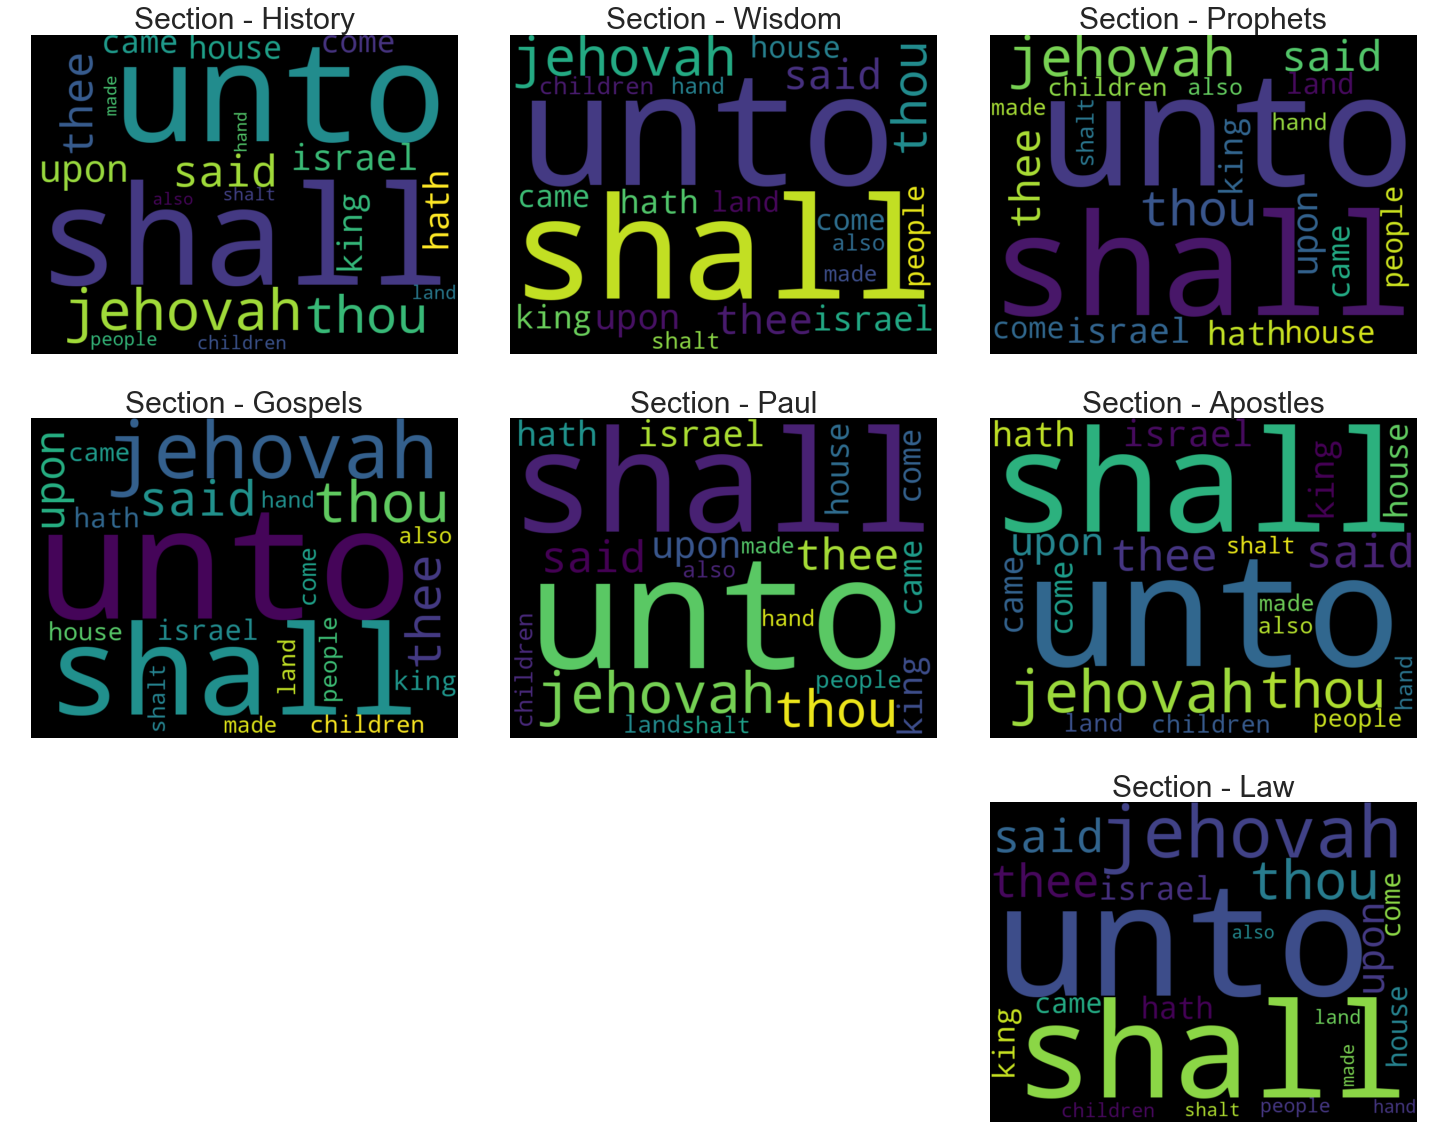

In [32]:
from nltk import sent_tokenize, word_tokenize, regexp_tokenize, FreqDist
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

#!pip install wordcloud
books = bible.Books.unique()
sections = bible.Sections.unique()
from wordcloud import WordCloud, STOPWORDS
def tokenize(text, pat='(?u)\\b\\w\\w+\\b', stop_words='english', min_len=4):
    if stop_words:
        stop = set(stopwords.words(stop_words))
    return [w
            for w in regexp_tokenize(text.casefold(), pat)
            if w not in stop and len(w) >= min_len]

count = 1
plt.figure(figsize=(25,20))
for i in range(len(sections)):
    X = X_train.loc[X_train['Sections']==sections[i]]
    X = X_train['text']
    words = tokenize(X.str.cat(sep=' '), min_len=4)
    fdist = FreqDist(words)

    n = '33{:}'.format(i)
    plt.subplot(n)
    wc = WordCloud(width=800, height=600, max_words=20).generate_from_frequencies(fdist)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Section - {:}'.format(sections[i]),size = 30)
    plt.subplots_adjust(wspace=.1)
    count = count + 1
plt.show()

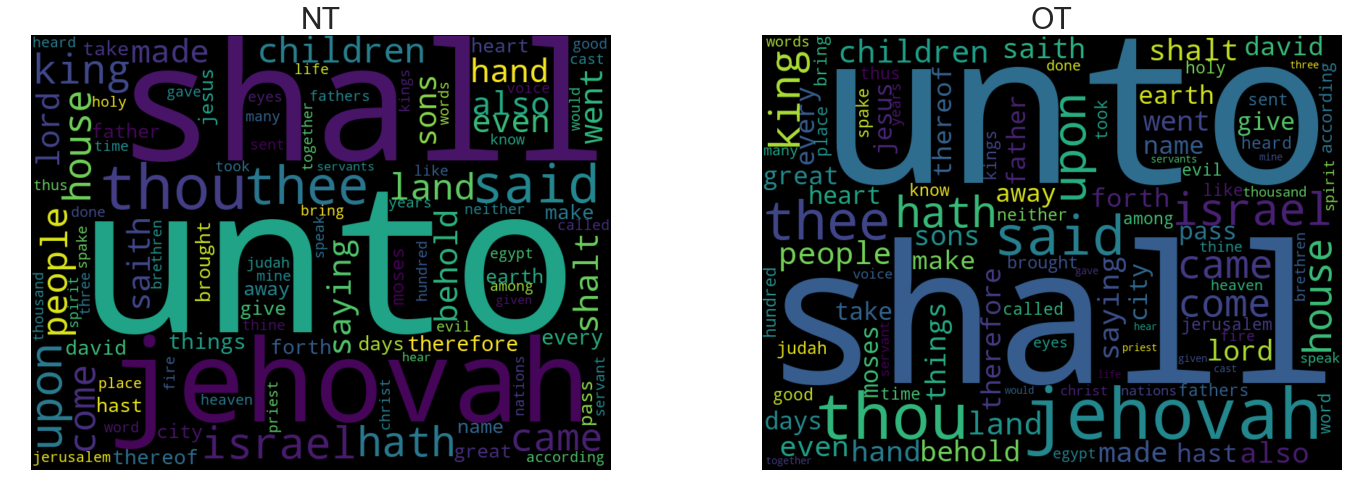

In [48]:
from nltk import sent_tokenize, word_tokenize, regexp_tokenize, FreqDist
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

def tokenize(text, pat='(?u)\\b\\w\\w+\\b', stop_words='english', min_len=2):
    if stop_words:
        stop = set(stopwords.words(stop_words))
    return [w
            for w in regexp_tokenize(text.casefold(), pat)
            if w not in stop and len(w) >= min_len]

testaments = bible.Testaments.unique()
#X = X_train.loc[X_train[]=='Law']
#print(X)
count = 1
plt.figure(figsize=(25,8))
for i in range(len(testaments)):
    X = X_train.loc[X_train['Testaments']==testaments[i]]
    X = X_train['text']
    words = tokenize(X.str.cat(sep=' '), min_len=4)
    fdist = FreqDist(words)

    n = '12{:}'.format(i)
    plt.subplot(n)
    wc = WordCloud(width=800, height=600, max_words=100).generate_from_frequencies(fdist)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('{:}'.format(testaments[i]),size = 30)
    plt.subplots_adjust(wspace=.1)
    count = count + 1
plt.show()

#### B. How would Association Analyses help to reveal characteristic word clusters? Produce word clouds for the top 10 words clusters with the top 100 most frquent words. Describe these word clusters, and what they are telling you about the Bible. How do these top 10 words clouds represent the 2 Testaments and the 7 Sections?

Association analysis would help compare which words often occur together as well as show which cluster groups they are most probably a part of. The above word clusters show the top 100 words for each section, as well as each testament. The two word clouds for the testaments show the main difference in the language used. For example, Jehova is said more in the new testament than the old testament.Also, Jerusalem and egypt are in the top words in the new testament, and not in the top for the old testament.These occurances can suggest alot about the topics of the sections and testaments. 

#### C. How would Seriation Analyses help to reveal the structure of these 66 Books?
Seriation analysis would help reveal the order of words in the verse's, books or sections. This could furhter help to investigate the different syntax and languages used in different sections. From a historical perspective, this could even help traceback origins and the timeline of books or stories in the bible.